### Ontario Fire - Random Forest Classifier

This model uses data that has been previously cleaned in our preliminary steps. We will now use the cleaned data to predict the risk of fires per 1,000 persons is Low, Normal, or High based on the demographics of people that live in the area.

In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('C:/Users/kenhu/Desktop/FireRandomForest.csv')

In [13]:
df.head()

,PercentElderly,PercentYoung,PercentUnemployed,PercentLowEducation,Category
0,7.5,7.2,4.3,16.115530,2
1,14.3,5.4,6.5,26.719577,2
2,12.9,5.9,6.1,22.756757,2
3,13.2,5.7,6.2,18.893281,3
4,16.8,4.9,NaN,NaN,3


In [20]:
df = df.dropna()

In [21]:
df.isna

<bound method DataFrame.isna of      PercentElderly  PercentYoung  PercentUnemployed  PercentLowEducation  \
0               7.5           7.2                4.3            16.115530   
1              14.3           5.4                6.5            26.719577   
2              12.9           5.9                6.1            22.756757   
3              13.2           5.7                6.2            18.893281   
7              21.8           4.6                7.7            19.449129   
..              ...           ...                ...                  ...   
511            10.1           5.2                9.6            17.910448   
512            14.2           7.0                7.6            22.978383   
513             8.0           8.3                5.0            22.250316   
514            17.5           6.5                7.6            22.702703   
515            14.7           5.6                7.6            22.610075   

     Category  
0           2  
1          

In [9]:
df = df.drop(columns='postcode3')
df = df.drop(columns='PSDDWELL_CSD11')
df = df.drop(columns='FiresPer1000')

In [45]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

X=df[['PercentElderly', 'PercentYoung', 'PercentUnemployed', 'PercentLowEducation']]  # Features
y=df['Category']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # 80% training and 30% test

In [46]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=200, random_state=33)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [47]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7941176470588235


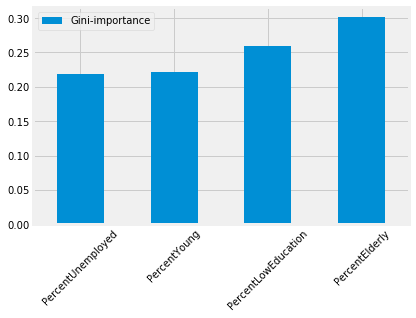

In [58]:
import pandas as pd
%matplotlib inline
#do code to support model
#"data" is the X dataframe and model is the SKlearn object

feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(df.columns, clf.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance').plot(kind='bar', rot=45)

### Second Run - Removing Unemployed

In [68]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

X=df[['PercentElderly', 'PercentYoung', 'PercentLowEducation']]  # Features
y=df['Category']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 80% training and 30% test

In [69]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=200, random_state=33)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [70]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7647058823529411


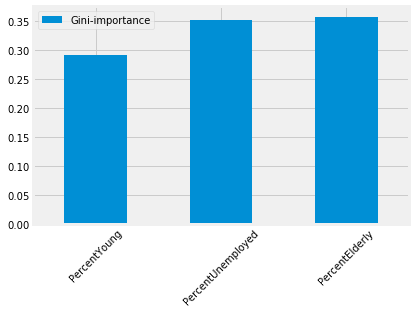

In [71]:
import pandas as pd
%matplotlib inline
#do code to support model
#"data" is the X dataframe and model is the SKlearn object

feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(df.columns, clf.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance').plot(kind='bar', rot=45)

In [67]:
#Whistler prediction
clf.predict([[5.1, 5, 3.3]])

array([2], dtype=int64)

In [ ]:
### Surrey prediction
clf.predict([[7.5,19.8,10.9]])